In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pycountry as pc
import matplotlib.ticker as mtick


In [174]:
df = pd.read_csv('Ritz_Jager_Data.csv')

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel_type                      119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal_type       

In [176]:
#Check Null Value
df.isna().sum().sort_values(ascending = False)

company                           112593
agent                              16340
country_origin                       488
children                               4
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
is_canceled                            0
market_segment                         0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
babies                                 0
meal_type                              0
reservation_status_date                0
distribution_channel                   0
reservation_status                     0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes 

In [177]:
#fill the missing values agent, company with zero
df[['agent','company']] = df[['agent','company']].fillna(0.0)

In [178]:
#fill the missing values of children with mean

df['children'].fillna(df.children.mean(), inplace=True)

In [179]:
#fill the missing values of country_origin with mode
df['country_origin'].fillna(df.country_origin.mode().to_string(), inplace=True)


In [180]:
df[(df.adults+df.babies+df.children)==0].shape

(180, 32)

In [181]:
df = df.drop(df[(df.adults+df.babies+df.children)==0].index)



In [182]:
df.dtypes

hotel_type                         object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal_type                          object
country_origin                     object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [183]:
df[['children', 'agent', 'company']] = df[['children', 'agent', 'company']].astype(int)

In [184]:
df.dtypes

hotel_type                         object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
meal_type                          object
country_origin                     object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [185]:
#Exploratory Data Analysis
#1. Where do the guests come from

def get_count(series, limit=None):   
    if limit != None:
        series = series.value_counts()[:limit]
    else:
        series = series.value_counts()
    
    x = series.index
    y = series/series.sum()*100
    
    return x.values,y.values

In [186]:
def plot(x, y, x_label=None,y_label=None, title=None, figsize=(7,5), type='bar'):
    
    sn.set_style('darkgrid')
    
    fig, ax = plt.subplots(figsize=figsize)
    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    
    if x_label != None:
        ax.set_xlabel(x_label)
    
    if y_label != None:
        ax.set_ylabel(y_label)
        
    if title != None:
        ax.set_title(title)
    
    if type == 'bar':
        sn.barplot(x,y, ax = ax)
    elif type == 'line':
        sn.lineplot(x,y, ax = ax, sort=False)
        
    
    plt.show()

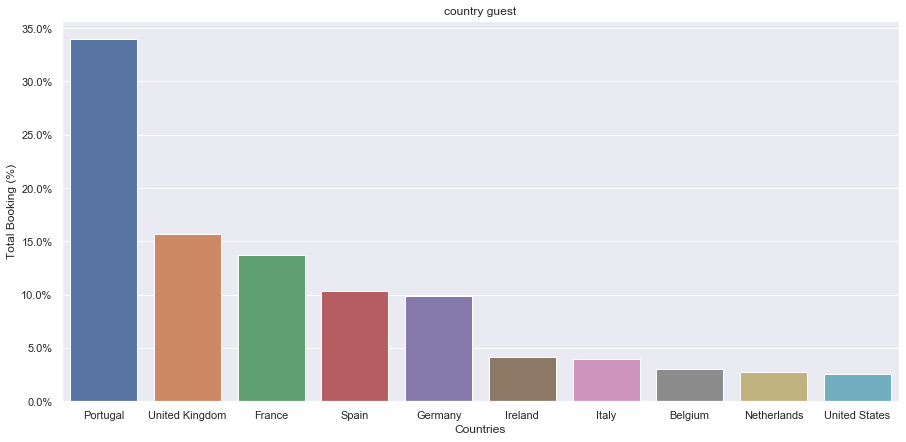

In [187]:
df_not_canceled = df[df['is_canceled'] == 0]
x,y = get_count(df_not_canceled['country_origin'], limit=10)

## For each country code select the country name 
country_name = [pc.countries.get(alpha_3=name).name for name in x]

plot(country_name,y, x_label='Countries', y_label='Total Booking (%)', title='country guest', figsize=(15,7))

In [188]:
#2. How much do guests pay for a room per night?
df['adr'].describe()

count    119210.000000
mean        101.969092
std          50.434007
min          -6.380000
25%          69.500000
50%          94.950000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

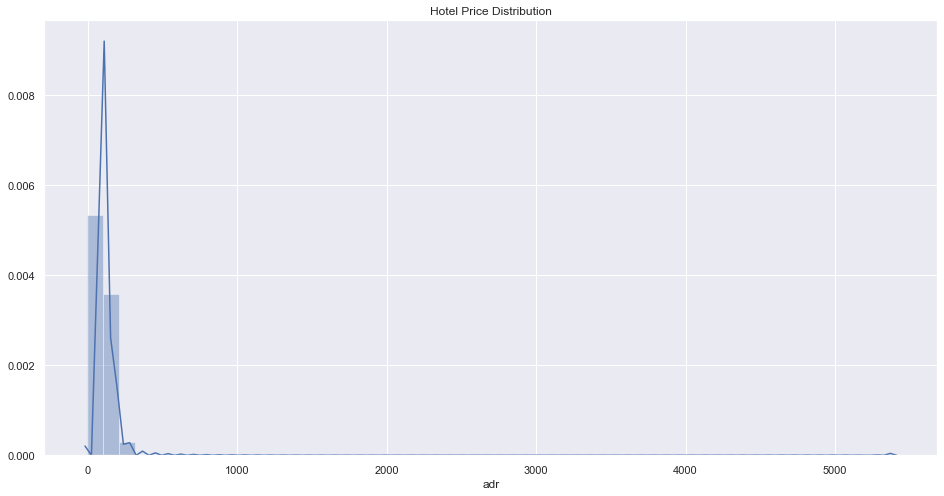

In [189]:
fig,ax = plt.subplots()
fig.set_size_inches(16, 8)

ax = sn.distplot(df.adr).set(title='Hotel Price Distribution')

In [190]:
city_hotel = df[(df['hotel_type']=='City Hotel') & (df['is_canceled'] == 0) & (df.adr > 0) ]
resort_hotel = df[(df['hotel_type']=='Resort Hotel') & (df['is_canceled'] == 0 & (df.adr > 0))]

print('For non-canceled reservation and all room types:\nCity Hotel median price: ${}\nResort Hotel median price: ${}\n'.format(city_hotel.adr.median(),resort_hotel.adr.median()))

For non-canceled reservation and all room types:
City Hotel median price: $100.3
Resort Hotel median price: $72.0



In [191]:
#3. How does the price per night vary over the year?

price_year = df.groupby('arrival_date_year')['adr'].median().reset_index()
price_year

,arrival_date_year,adr
0,2015,77.93
1,2016,91.00
2,2017,107.10


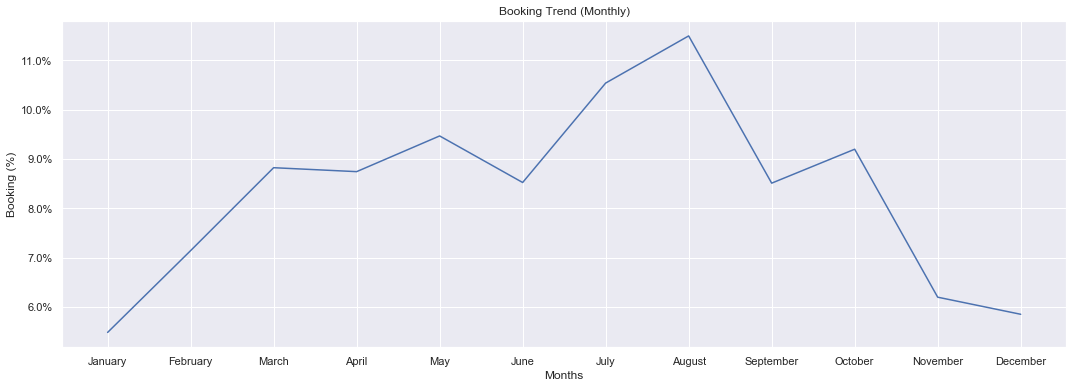

In [192]:
#4. Which are the busiest months?
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
             'October', 'November', 'December']

sorted_months = df_not_canceled['arrival_date_month'].value_counts().reindex(new_order)

x = sorted_months.index
y = sorted_months/sorted_months.sum()*100


#sns.lineplot(x, y.values)
plot(x, y.values, x_label='Months', y_label='Booking (%)', title='Booking Trend (Monthly)', type='line', figsize=(18,6))

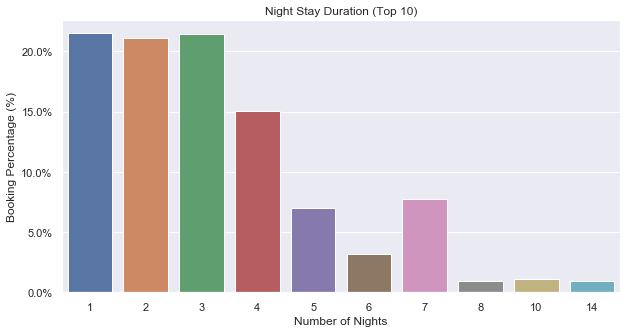

In [193]:
#5. How long do people stay at the hotels?
total_nights = df_not_canceled['stays_in_weekend_nights']+ df_not_canceled['stays_in_week_nights']
x,y = get_count(total_nights, limit=10)

plot(x,y, x_label='Number of Nights', y_label='Booking Percentage (%)', title='Night Stay Duration (Top 10)', figsize=(10,5))

In [194]:
#6. Bookings by market segment
segment = df[(df.is_canceled == 0)].groupby('market_segment').size()
segment.sort_values(ascending=False)

market_segment
Online TA        35673
Offline TA/TO    15880
Direct           10648
Groups            7697
Corporate         4291
Complementary      639
Aviation           183
dtype: int64

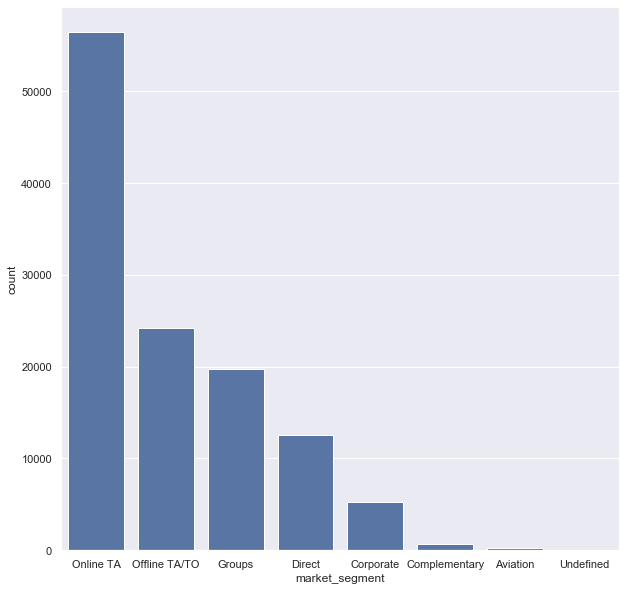

In [195]:
sn.countplot(df['market_segment'], order = df['market_segment'].value_counts().index, color='b')
sn.set(rc={'figure.figsize':(10,10)})

In [196]:
#7. How many bookings were cancelled? 
print (df['is_canceled'].sum())


44199


In [197]:
#8. Which month has the highest number of cancellations?
df[df.is_canceled == 1].groupby('arrival_date_month').size().sort_values(ascending=False)

arrival_date_month
August       5237
July         4737
May          4677
June         4534
April        4518
October      4246
September    4115
March        3148
February     2693
December     2368
November     2120
January      1806
dtype: int64